In [57]:
import numpy as np
import pandas as pd

In [58]:
df=pd.read_csv(r"C:\Users\user\Desktop\workspace\ML practice\Datasets\cars.csv")

In [59]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [60]:
df['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [61]:
pd.get_dummies(df,columns=['fuel','owner'],drop_first=True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,1,0,0,0,0,0,0
1,Skoda,120000,370000,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,0
4,Maruti,120000,130000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,1,0,0,0,0
8124,Hyundai,119000,135000,1,0,0,1,0,0,0
8125,Maruti,120000,382000,1,0,0,0,0,0,0
8126,Tata,25000,290000,1,0,0,0,0,0,0


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2,random_state=42)

In [64]:
x_train

,brand,km_driven,fuel,owner
6518,Tata,2560,Petrol,First Owner
6144,Honda,80000,Petrol,Second Owner
6381,Hyundai,150000,Diesel,Fourth & Above Owner
438,Maruti,120000,Diesel,Second Owner
5939,Maruti,25000,Petrol,First Owner
...,...,...,...,...
5226,Mahindra,120000,Diesel,First Owner
5390,Maruti,80000,Diesel,Second Owner
860,Hyundai,35000,Petrol,First Owner
7603,Maruti,27000,Diesel,First Owner


In [17]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
ohe=OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

In [22]:
x_train_ohe=ohe.fit_transform(x_train[['fuel','owner']])

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
x_train_ohe

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0]])

In [25]:
x_test_ohe=ohe.transform(x_test[['fuel','owner']])

In [27]:
x_test_ohe

array([[0, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0]])

In [28]:
np.hstack((x_train[['brand','km_driven']].values,x_train_ohe))

array([['Tata', 2560, 0, ..., 0, 0, 0],
       ['Honda', 80000, 0, ..., 1, 0, 0],
       ['Hyundai', 150000, 1, ..., 0, 0, 0],
       ...,
       ['Hyundai', 35000, 0, ..., 0, 0, 0],
       ['Maruti', 27000, 1, ..., 0, 0, 0],
       ['Maruti', 70000, 0, ..., 1, 0, 0]], dtype=object)

In [30]:
np.hstack((x_test[['brand','km_driven']].values,x_test_ohe))

array([['Honda', 110000, 0, ..., 0, 0, 1],
       ['Tata', 291977, 1, ..., 0, 0, 0],
       ['Maruti', 70000, 1, ..., 0, 0, 0],
       ...,
       ['Hyundai', 54043, 0, ..., 0, 0, 0],
       ['Tata', 70000, 0, ..., 0, 0, 0],
       ['Chevrolet', 110000, 0, ..., 1, 0, 0]], dtype=object)

In [34]:
counts=df['brand'].value_counts()

In [35]:
df['brand'].nunique()
threshold=100

In [39]:
repl=counts[counts<=threshold].index

In [41]:
counts

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Ambassador          4
Kia                 4
MG                  3
Daewoo              3
Opel                1
Peugeot             1
Ashok               1
Name: brand, dtype: int64

In [40]:
pd.get_dummies(df['brand'].replace(repl,'uncommon')).sample(5)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
7707,0,0,0,0,0,0,0,0,0,0,1,0,0
147,0,0,0,0,0,0,1,0,0,0,0,0,0
1117,0,0,0,0,0,0,0,0,0,0,0,0,1
6809,0,0,0,0,0,0,0,1,0,0,0,0,0
5683,0,0,0,0,0,0,0,1,0,0,0,0,0


In [43]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [42]:
from sklearn.compose import ColumnTransformer

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [67]:
category_dict={
    'owner':['First Owner','Second Owner','Third Owner']
}

In [77]:
transformer=ColumnTransformer(transformers=[
   ('tnf1',OneHotEncoder(drop='first',sparse=False,dtype=np.int32),['brand','fuel']),
    ('tnf2',StandardScaler(),['km_driven']),
    ('tnf3',OrdinalEncoder(categories=[['Test Drive Car','First Owner','Second Owner','Third Owner','Fourth & Above Owner']]),['owner'])
],remainder='passthrough')

In [44]:
import seaborn as sns

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

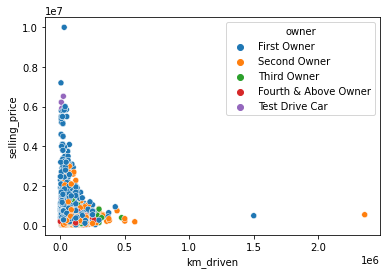

In [45]:
sns.scatterplot(df['km_driven'],df['selling_price'],hue=df['owner'])

In [79]:
x_train_trf=transformer.fit_transform(x_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [86]:
x_test_trf=transformer.transform(x_test)

In [89]:
x_test_trf=pd.DataFrame(x_test_trf)

In [81]:
x_train_trf=pd.DataFrame(x_train_trf)

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
model=LinearRegression()

In [90]:
model.fit(x_train_trf,y_train)

LinearRegression()

In [93]:
y_pred=model.predict(x_test_trf)

In [94]:
from sklearn.metrics import r2_score

In [95]:
r2_score(y_test,y_pred)

0.7658719479114975

In [96]:
brand_counts = df['brand'].value_counts()
less_frequent_brands = brand_counts[brand_counts < 100].index.tolist()

In [97]:
less_frequent_brands

['Nissan',
 'Jaguar',
 'Volvo',
 'Datsun',
 'Mercedes-Benz',
 'Fiat',
 'Audi',
 'Lexus',
 'Jeep',
 'Mitsubishi',
 'Force',
 'Land',
 'Isuzu',
 'Ambassador',
 'Kia',
 'MG',
 'Daewoo',
 'Opel',
 'Peugeot',
 'Ashok']

In [98]:
df['brand_category'] = df['brand'].apply(lambda x: x if x not in less_frequent_brands else 'Other')

In [101]:
df['brand_category'].value_counts()

Maruti        2448
Hyundai       1415
Mahindra       772
Tata           734
Other          538
Toyota         488
Honda          467
Ford           397
Chevrolet      230
Renault        228
Volkswagen     186
BMW            120
Skoda          105
Name: brand_category, dtype: int64

In [102]:
df

,brand,km_driven,fuel,owner,selling_price,brand_category
0,Maruti,145500,Diesel,First Owner,450000,Maruti
1,Skoda,120000,Diesel,Second Owner,370000,Skoda
2,Honda,140000,Petrol,Third Owner,158000,Honda
3,Hyundai,127000,Diesel,First Owner,225000,Hyundai
4,Maruti,120000,Petrol,First Owner,130000,Maruti
...,...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000,Hyundai
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000,Hyundai
8125,Maruti,120000,Diesel,First Owner,382000,Maruti
8126,Tata,25000,Diesel,First Owner,290000,Tata


In [103]:
new_df=df.drop(columns=['brand'],axis=1)

In [116]:
new_df

,brand_category,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000


In [109]:
new_df=new_df[['brand_category','km_driven','fuel','owner','selling_price']]

In [112]:
x=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
new_tranformer=ColumnTransformer(transformer=[
    ('ntrf1',OneHotEncoder(drop='first',sparse=False,dtype=np.int32),['brand_category','fuel']),
    ('ntrf3',OrdinalEncoder(categories=[['Test Drive Car','First Owner','Second Owner','Third Owner','Fourth & Above Owner']]),['owner']),
    ('ntrf3',StandardScaler(),['km_driven'])
],remainder='passthrough')

In [126]:
transformer2 = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(drop='first',sparse=False,dtype=np.int32),['brand_category','fuel']),
    ('tnf2',OrdinalEncoder(categories=[['Test Drive Car','First Owner','Second Owner','Third Owner','Fourth & Above Owner']]),['owner']),
    ('tnf3',StandardScaler(),['km_driven'])
],remainder='passthrough')

In [128]:
x_train_trf1=transformer2.fit_transform(x_train)
x_test_trf1=transformer2.transform(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [134]:
pd.DataFrame(x_train_trf1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.833638
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.498194
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.524909
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-0.524909
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,-0.004972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5684,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.833638
5685,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.162750
5686,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.591998
5687,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.726176


In [132]:
model2=LogisticRegression()

In [133]:
model2.fit(x_train_trf1,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [136]:
y_pred1=model2.predict(x_test_trf1)

In [137]:
r2_score(y_test,y_pred1)

0.15665494226840915